<a href="https://colab.research.google.com/github/Niknuby/CSCK506-JANUARY-2025-B/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
organizations_zalando_research_fashionmnist_path = kagglehub.dataset_download('organizations/zalando-research/fashionmnist')

print('Data source import complete.')


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0979 - loss: 2.3491 - val_accuracy: 0.0983 - val_loss: 2.2957
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1111 - loss: 2.2888 - val_accuracy: 0.1933 - val_loss: 2.2748
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2128 - loss: 2.2716 - val_accuracy: 0.3226 - val_loss: 2.2626
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3406 - loss: 2.2599 - val_accuracy: 0.3600 - val_loss: 2.2510
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3643 - loss: 2.2475 - val_accuracy: 0.3980 - val_loss: 2.2391
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3946 - loss: 2.2357 - val_accuracy: 0.4174 - val_loss: 2.2266
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4174 - loss: 2.2226 - val_accuracy: 0.4321 - val_loss: 2.2135
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4435 - loss: 2.2100 - val_accuracy: 0.4333 - v

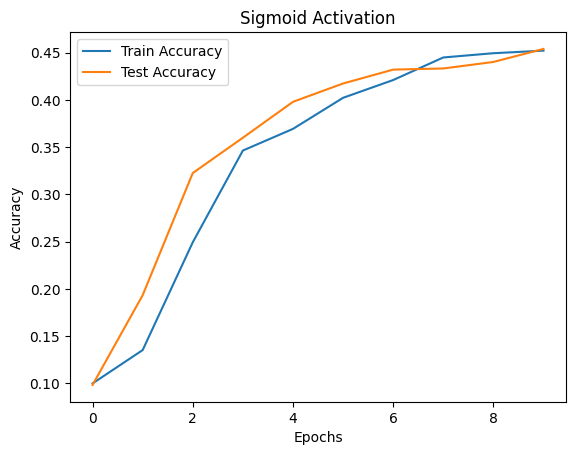

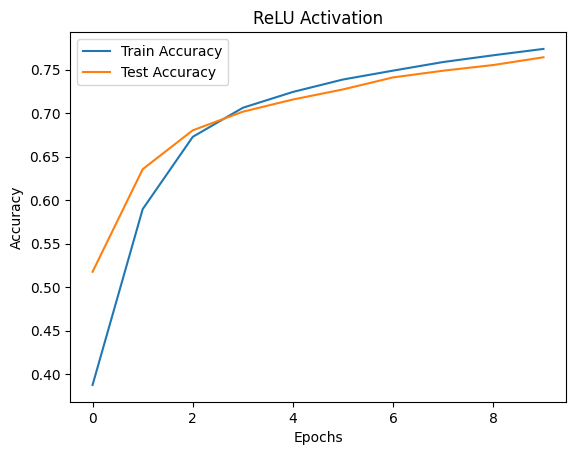

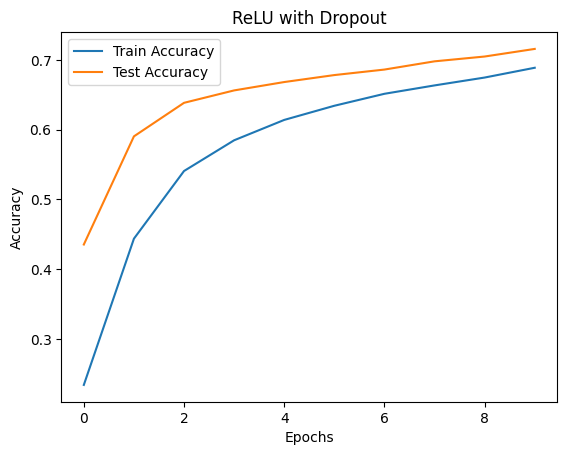

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data (scale pixel values to [0,1] range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model with Sigmoid activation function
def build_model(activation='sigmoid', dropout=False):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=activation),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model
def train_model(model, epochs=10, batch_size=1000):
    model.compile(optimizer=keras.optimizers.SGD(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test))
    return history

# Train the model with Sigmoid activation
model_sigmoid = build_model('sigmoid')
history_sigmoid = train_model(model_sigmoid)

# Train the model with ReLU activation
model_relu = build_model('relu')
history_relu = train_model(model_relu)

# Train the model with ReLU and Dropout
model_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

history_dropout = train_model(model_dropout)

# Function to plot results
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot results
plot_history(history_sigmoid, "Sigmoid Activation")
plot_history(history_relu, "ReLU Activation")
plot_history(history_dropout, "ReLU with Dropout")
